In [1]:
# Import libraries

import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

In [2]:
# Load csv

customer_df = pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
# Check main features

customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
# Rename columns to PE8 (snake case)

customer_df.columns = customer_df.columns.str.lower().str.replace(' ', '_')

In [5]:
# Set 'customer_id' column as the index

customer_df.set_index('customer', inplace=True)

# OR drop the 'customer_id' column
# customer_df.drop('customer', axis=1)

In [6]:
# Convert 'effective_to_date' to datetime format

customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

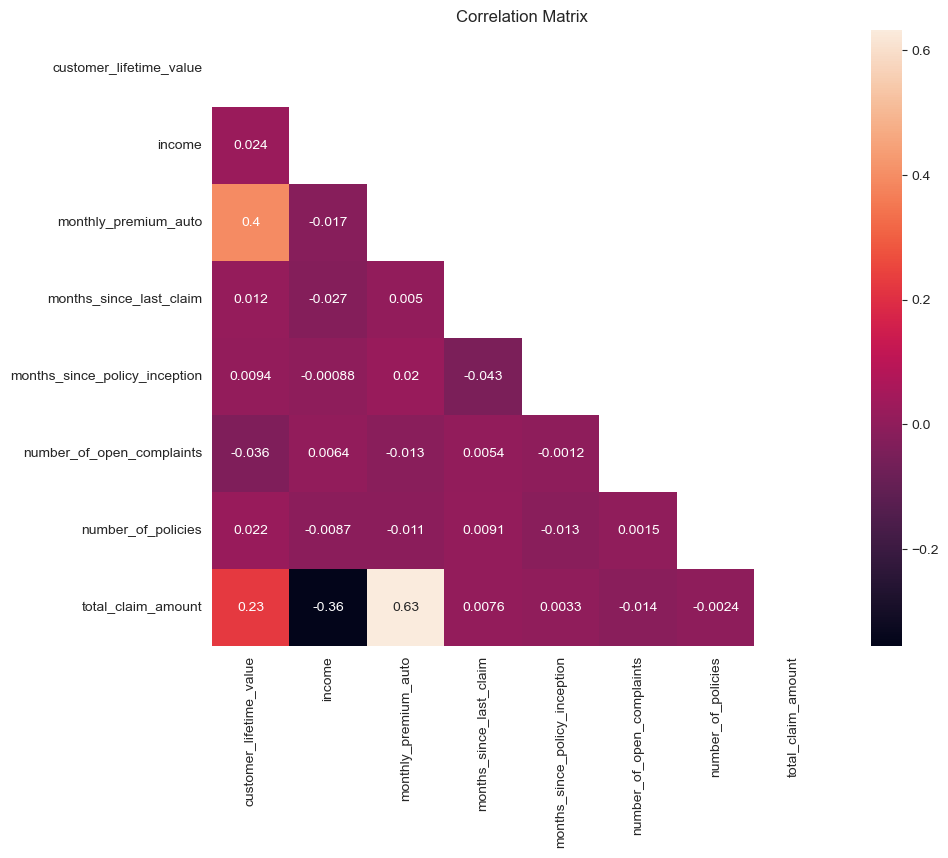

In [7]:
# Plot correlation matrix

corr_matrix = customer_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [8]:
# --> weak positive correlation between total_claim_amount and customer_lifetime_value.
# --> moderate positive correlation between monthly_premium_auto and customer_lifetime_value.
# --> strong positive correlation between total_claim_amount and monthly_premium_auto.
# --> moderate negative correlation between total_claim_amount and income.

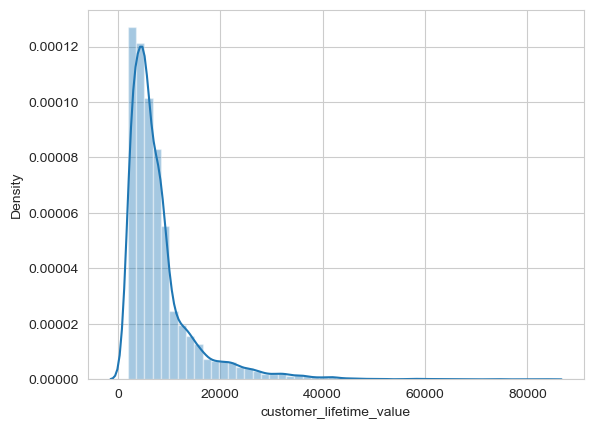

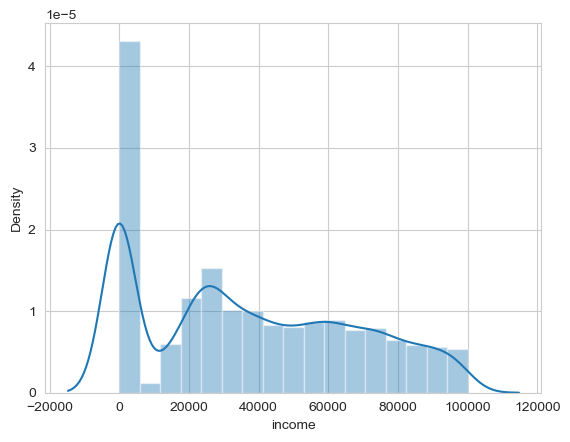

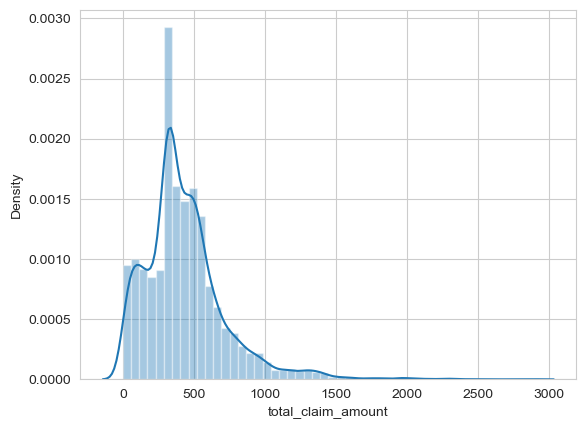

In [9]:
# Plot continuous variables

continuous = ['customer_lifetime_value', 'income', 'total_claim_amount']
for column in continuous:
    sns.distplot(customer_df[column])
    plt.xlabel(column)
    plt.show()

In [10]:
# --> The distribution of the variables 'customer_lifetime_value' and 'total_claim_amount' is peaky and fat-tailed.
# --> The distribution of income peaks between 0 to 5000, and ralatively flat between 20k to 100k.
# --> Try applying the normalization and transformation and see if it helps in improving the distribution.

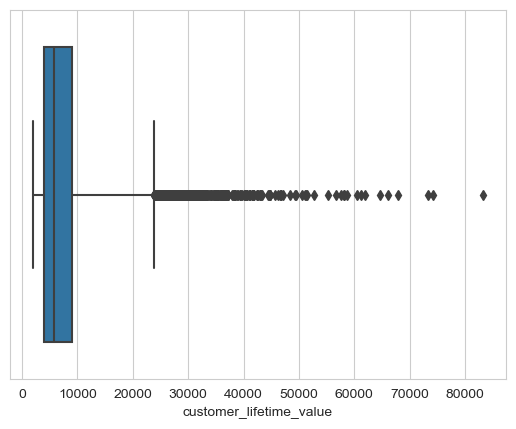

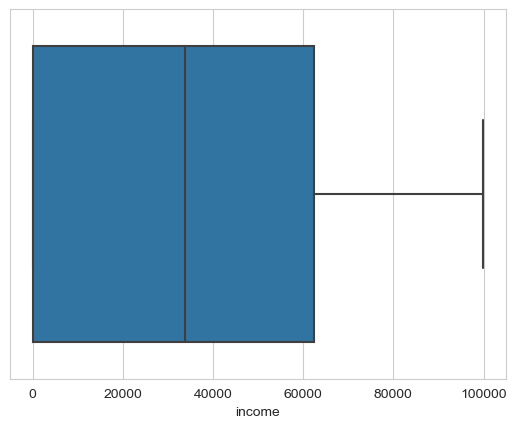

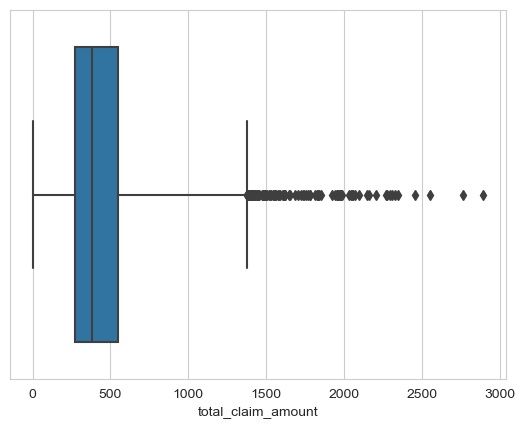

In [11]:
# Check outliers in continuous variables

for column in continuous:
    sns.boxplot(x=customer_df[column], whis=3)
    plt.xlabel(column)
    plt.show()

In [12]:
# --> The variables 'customer_lifetime_value' and 'total_claim_amount' have outliers. 
# --> Methods to deal with outliers: Transformations / Trimming / Winsorization / Modeling

In [13]:
# Transformations: applying a mathematical transformation to the data, such as logarithmic or square root, to make the distribution more normal and reduce the impact of outliers.
# Trimming: removing a certain percentage of the extreme values from the dataset.
# Winsorization: replacing the outliers with the next highest or lowest value within a certain percentile range.
# Modeling: using robust statistical methods or models that are less sensitive to outliers, such as quantile regression or random forests.

In [14]:
# Log transformation of variable "customer_lifetime_value"

# customer_df_trans = customer_df.copy()
# def log_tranform_clean(x):
#     x = np.log(x)
#     if np.isfinite(x):
#         return x
#     else:
#         return np.NAN

# customer_df_trans['customer_lifetime_value'] = list(map(log_tranform_clean, customer_df_trans['customer_lifetime_value']))
# sns.distplot(customer_df_trans['customer_lifetime_value'])
# plt.show()

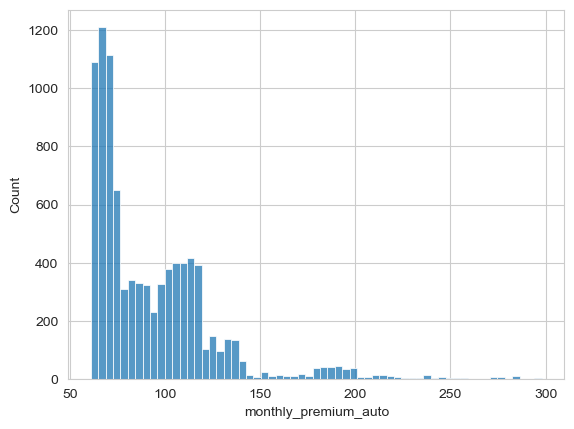

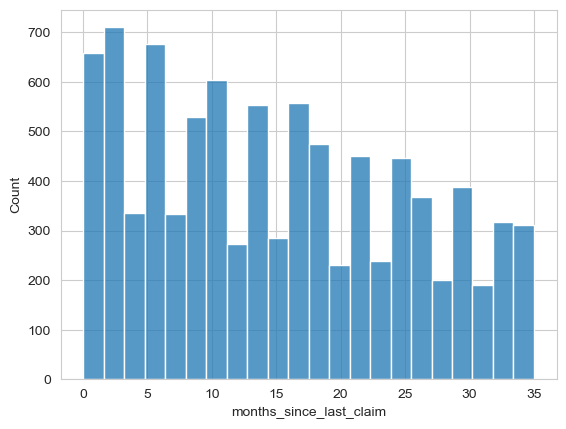

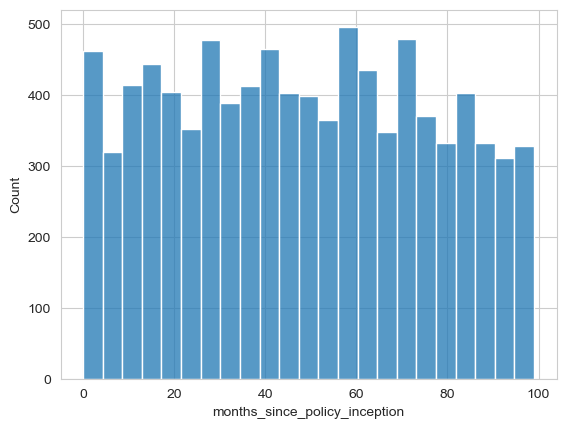

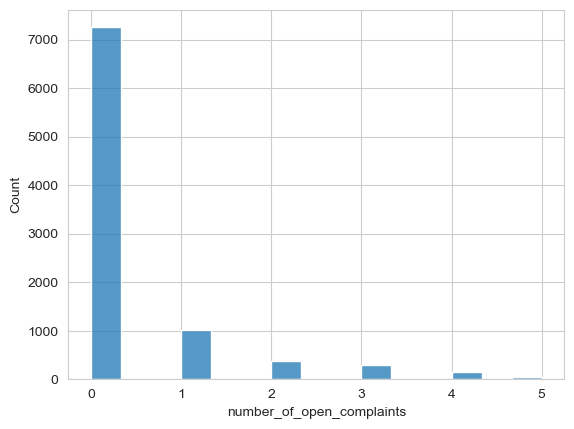

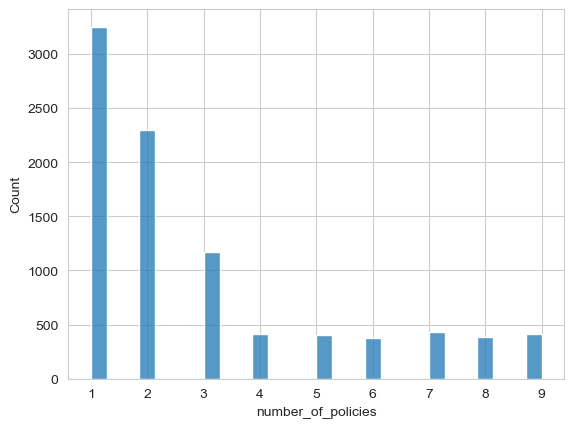

In [15]:
# Plot discrete varibles

discrete = ['monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']
for column in discrete:
    sns.histplot(x=customer_df[column])
    plt.xlabel(column)
    plt.show()

In [16]:
# Load continuous and discrete varibles into numericals_df

numerical_df = customer_df.select_dtypes(np.number)
numerical_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer,,,,,,,,
BU79786,2763.519279,56274,69,32,5,0,1,384.811147
QZ44356,6979.535903,0,94,13,42,0,8,1131.464935
AI49188,12887.431650,48767,108,18,38,0,2,566.472247
WW63253,7645.861827,0,106,18,65,0,7,529.881344
HB64268,2813.692575,43836,73,12,44,0,1,138.130879


In [17]:
# Load categorical varibles into categorical_df 

categorical_df = customer_df.select_dtypes(np.object)
categorical_df.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


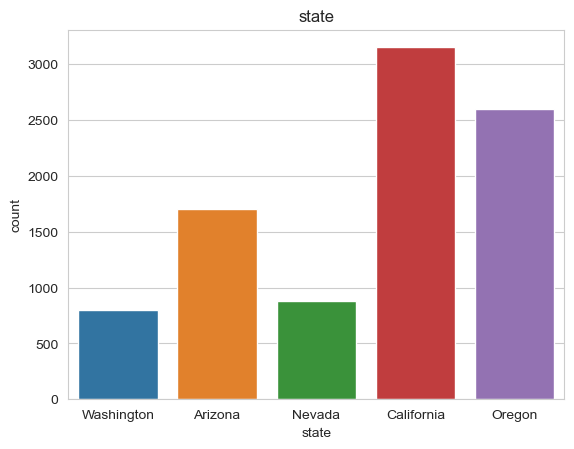

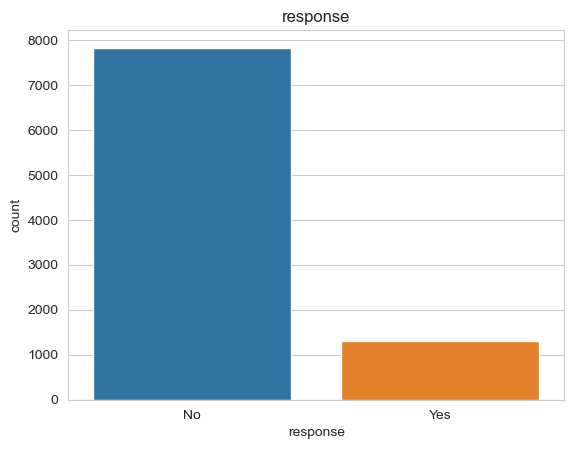

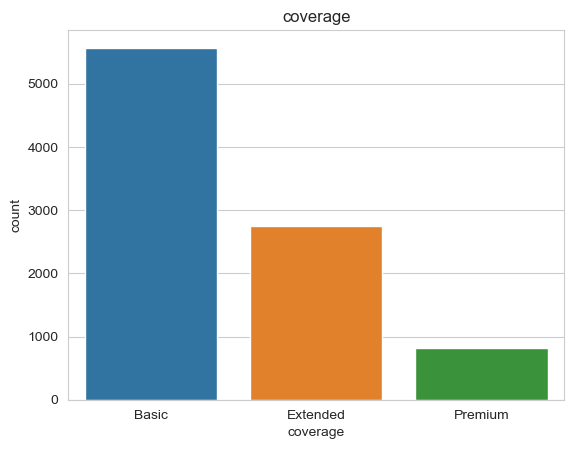

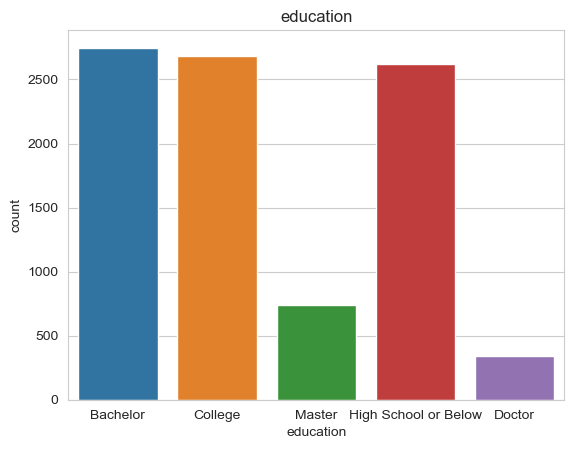

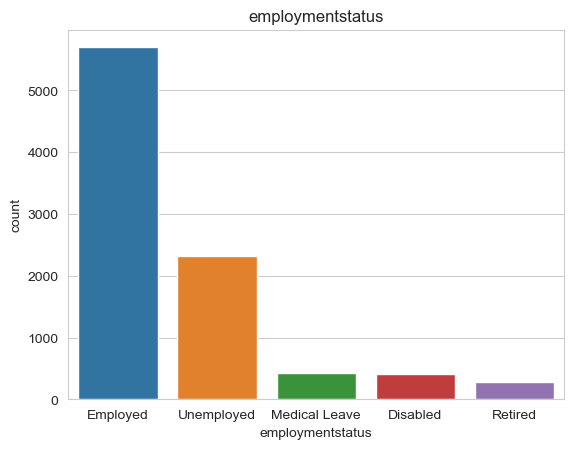

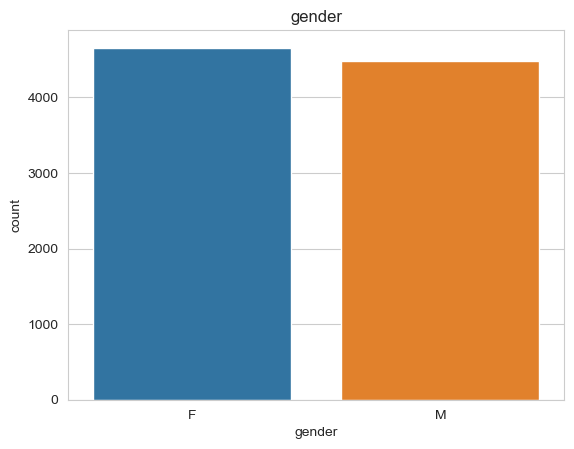

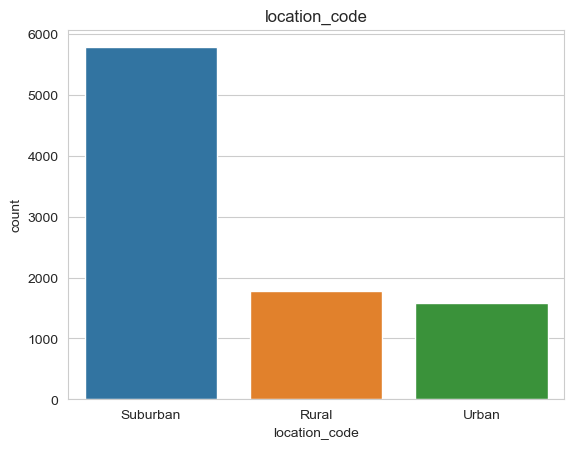

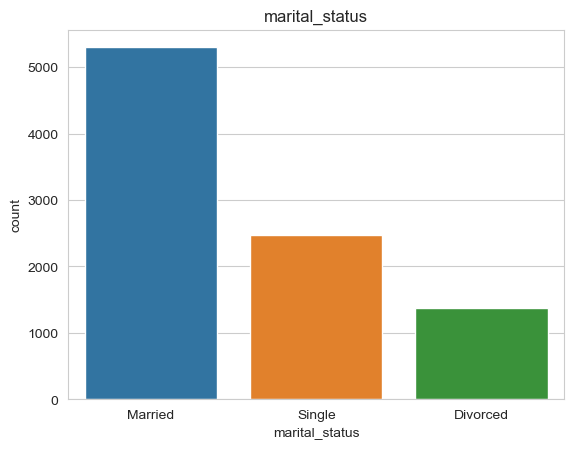

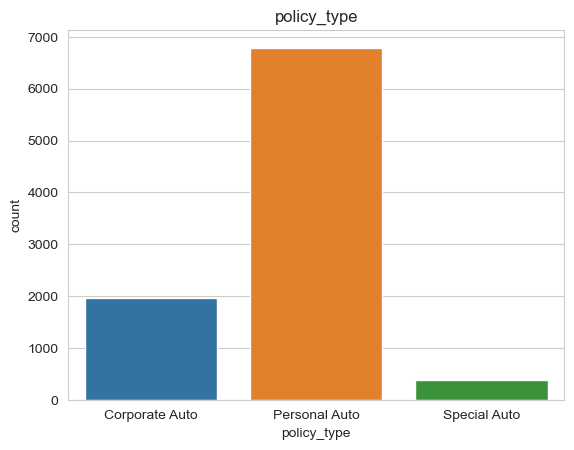

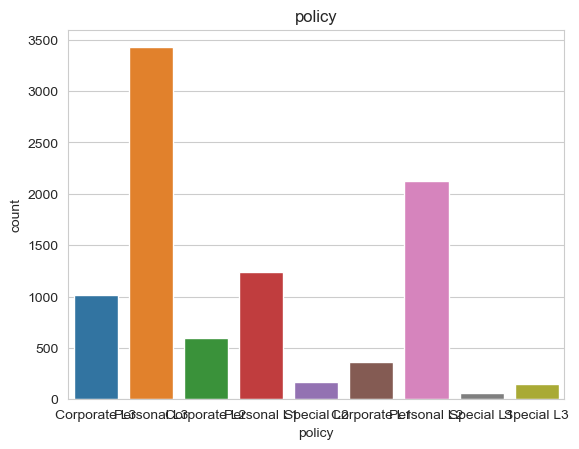

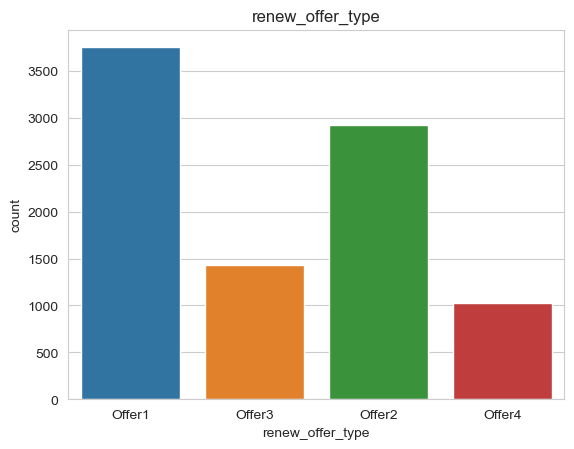

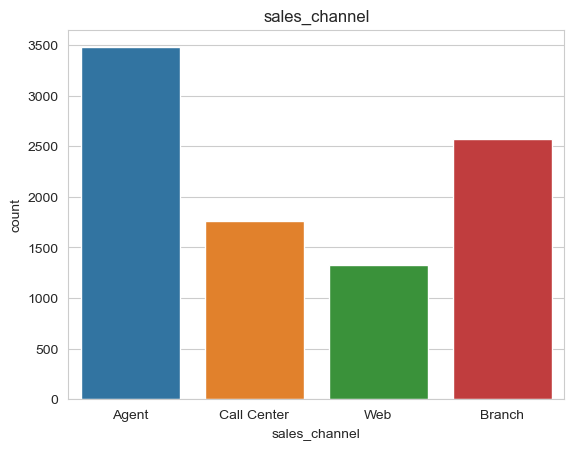

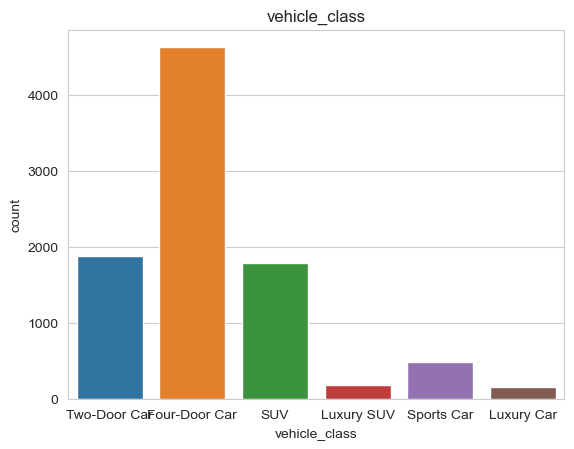

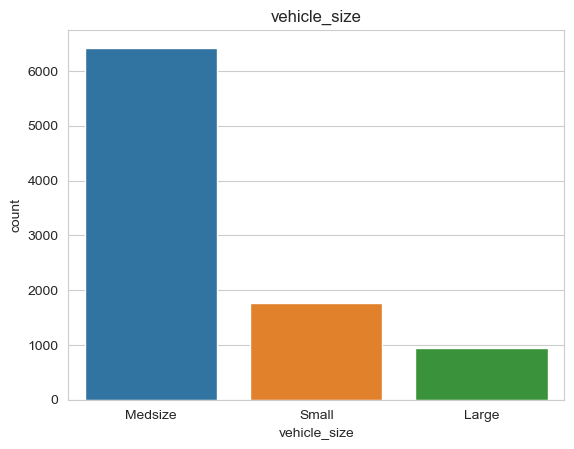

In [18]:
# Plot bar plots for categorical variables

for column in categorical_df:
    sns.countplot(x=column, data=customer_df)
    plt.title(column)
    plt.show()

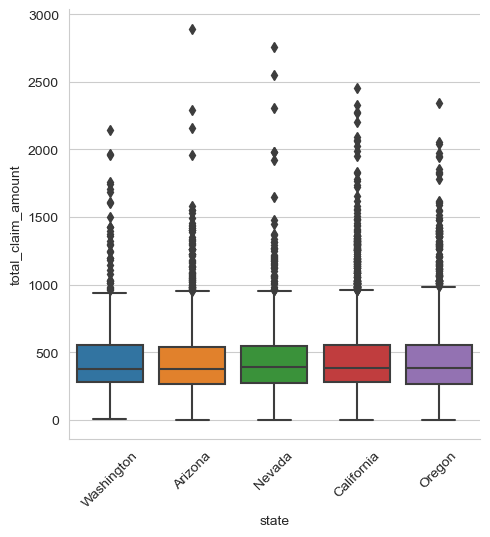

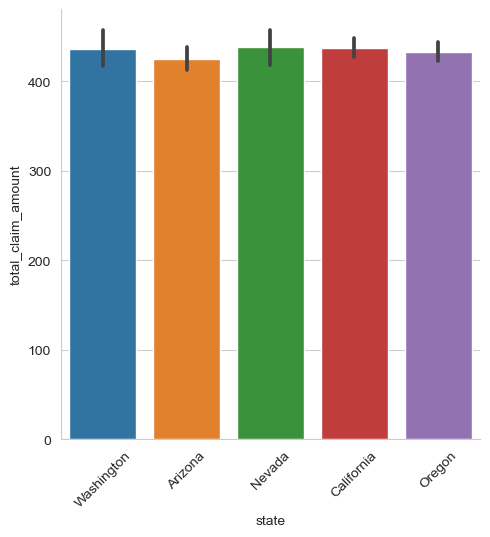

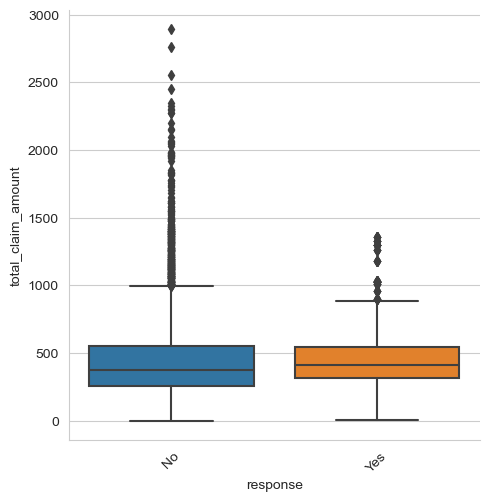

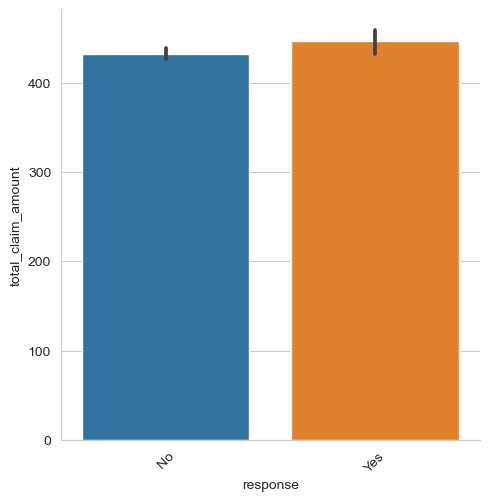

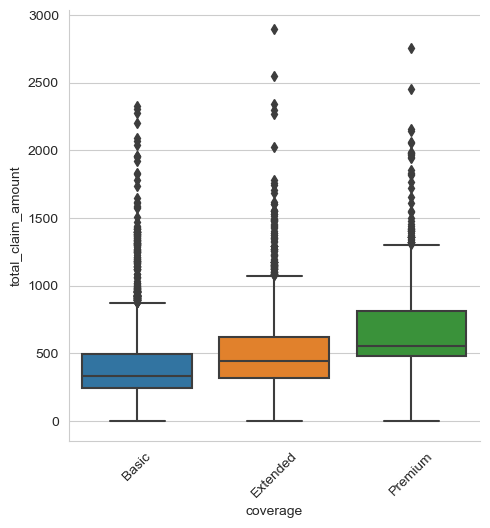

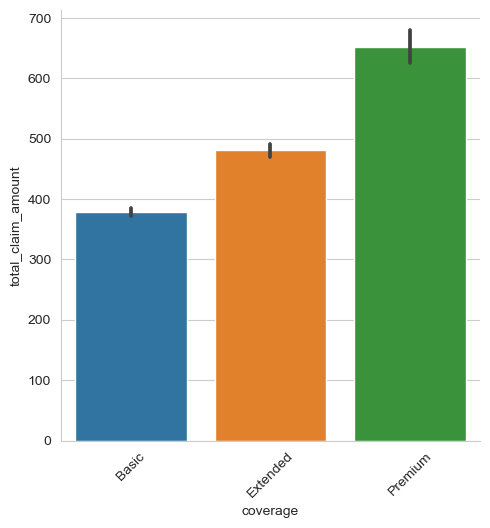

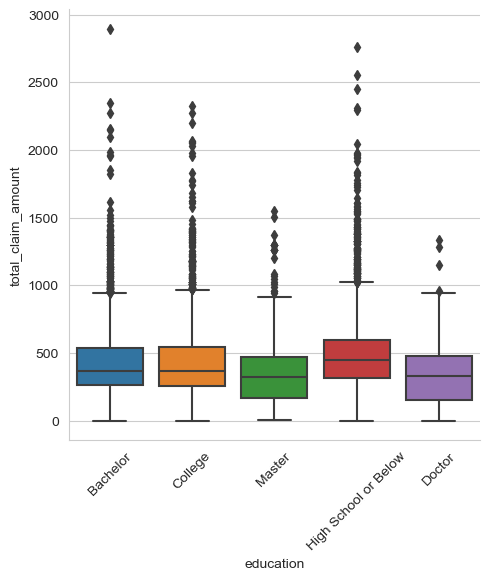

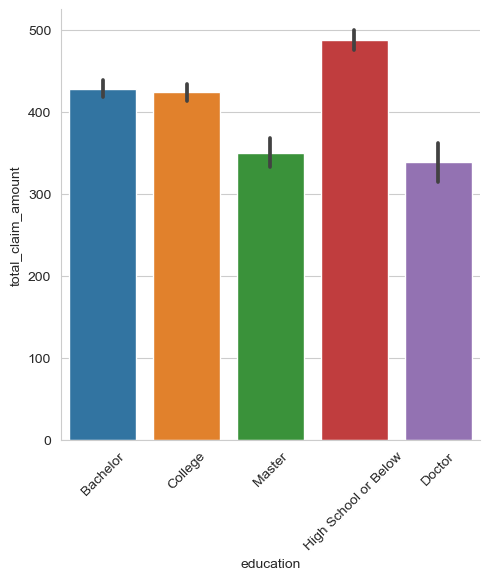

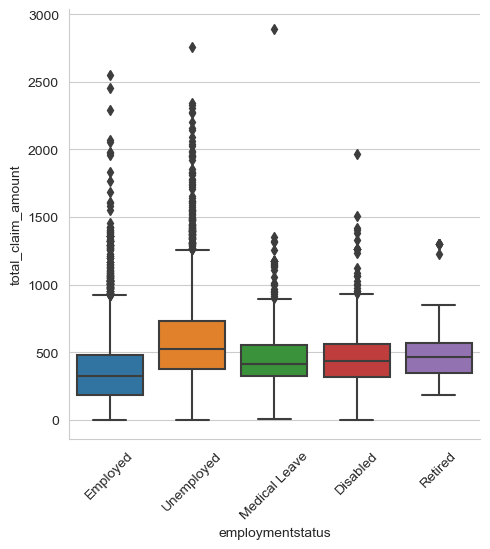

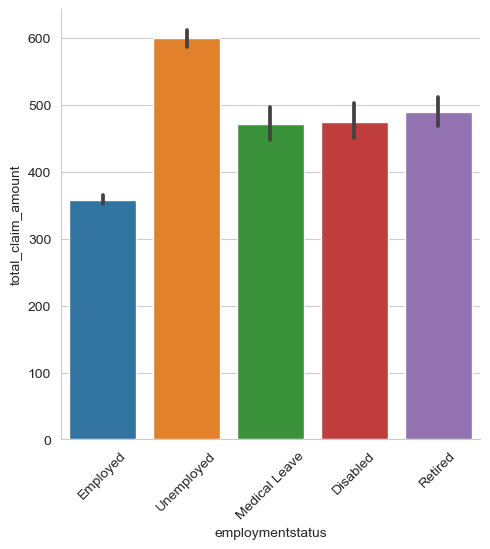

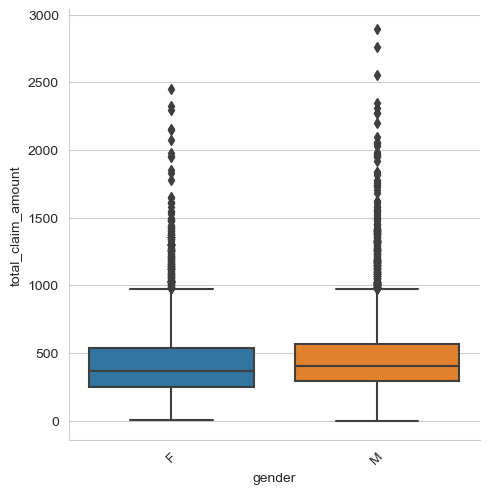

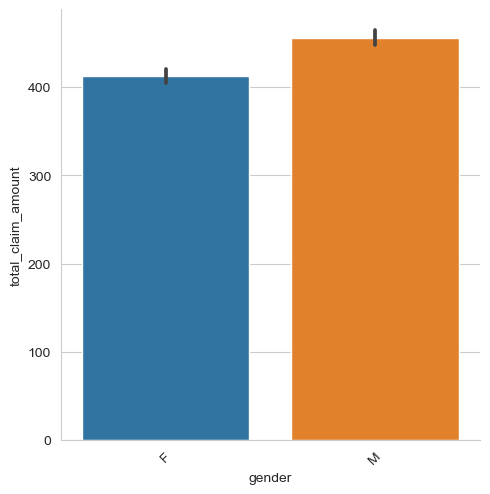

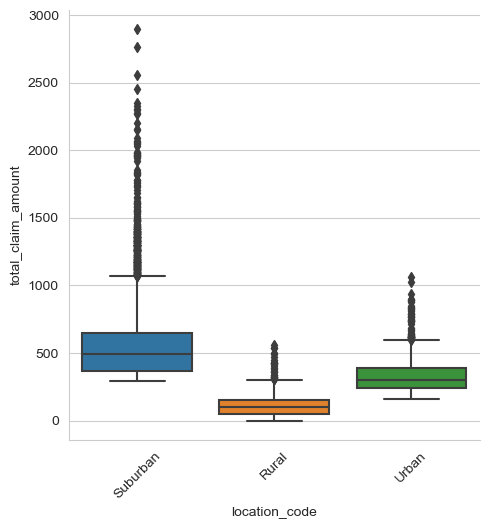

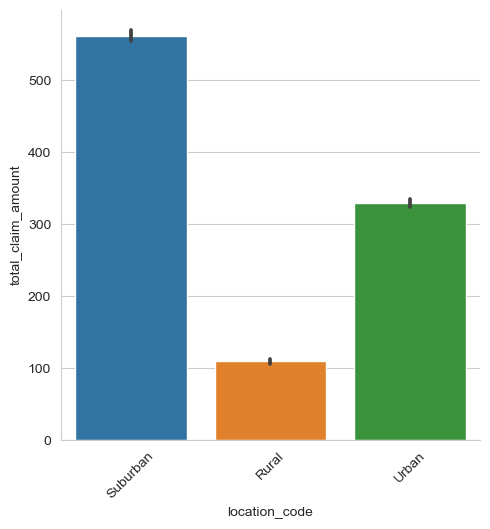

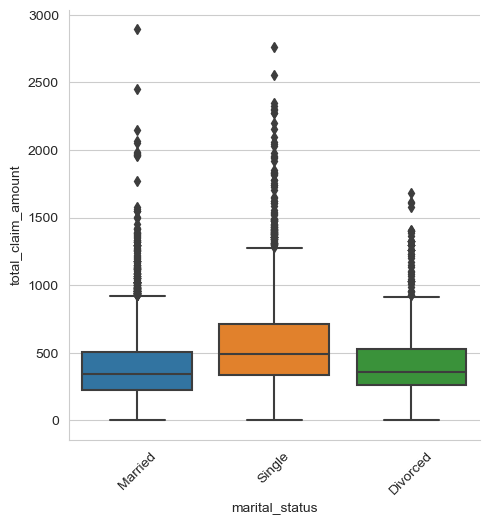

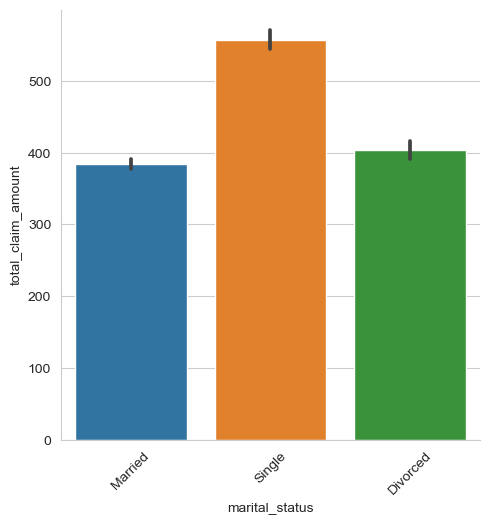

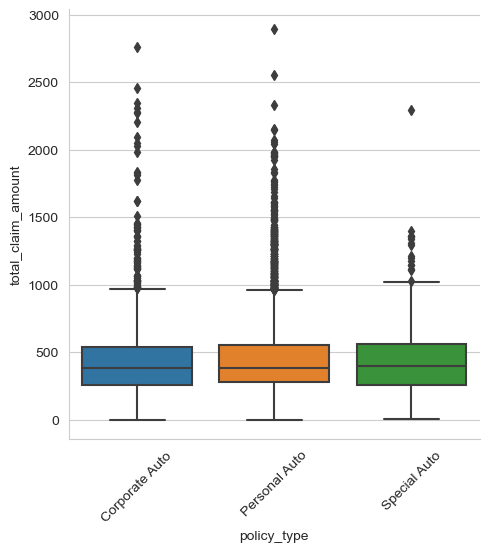

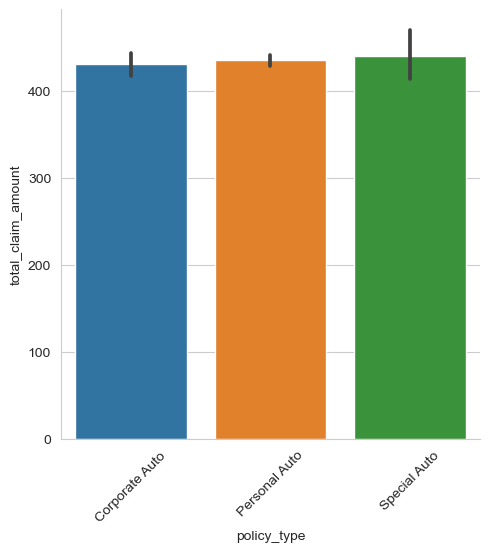

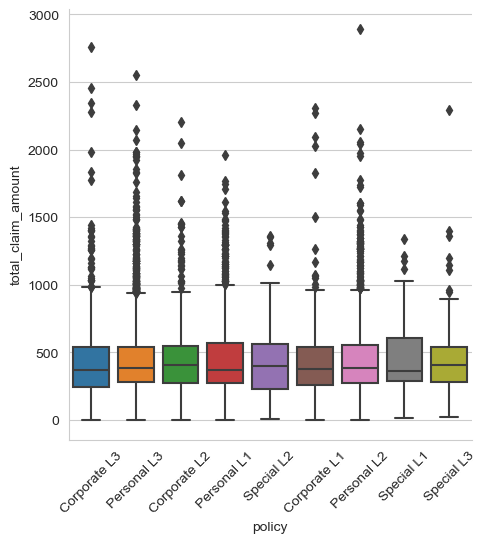

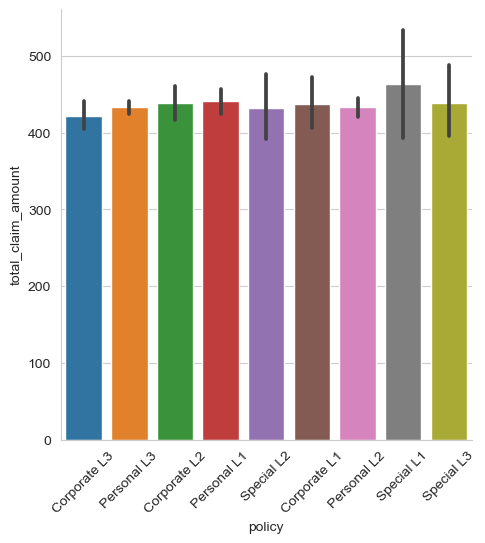

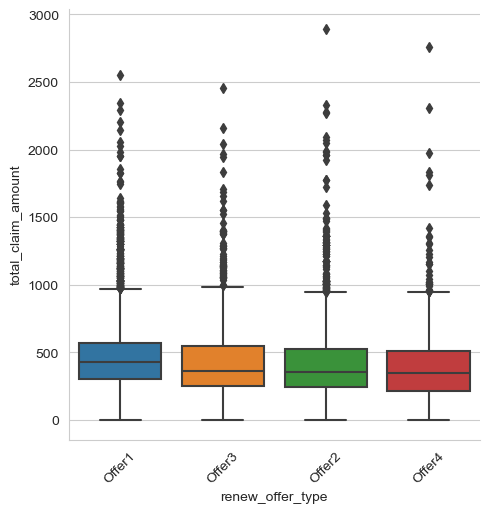

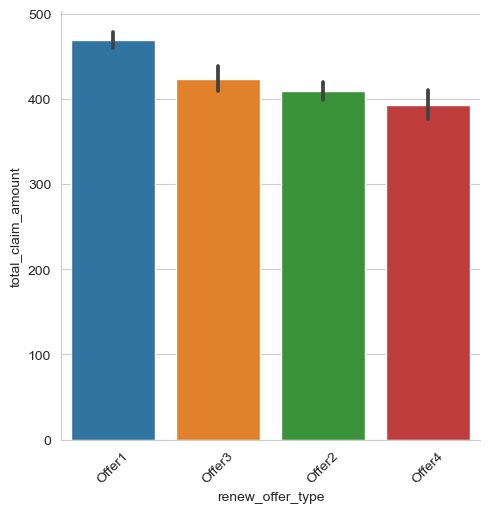

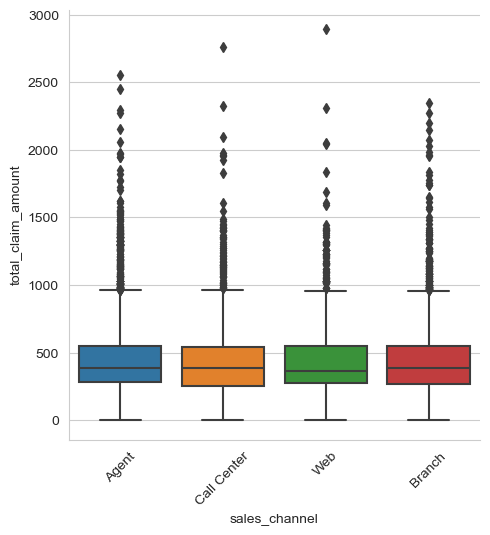

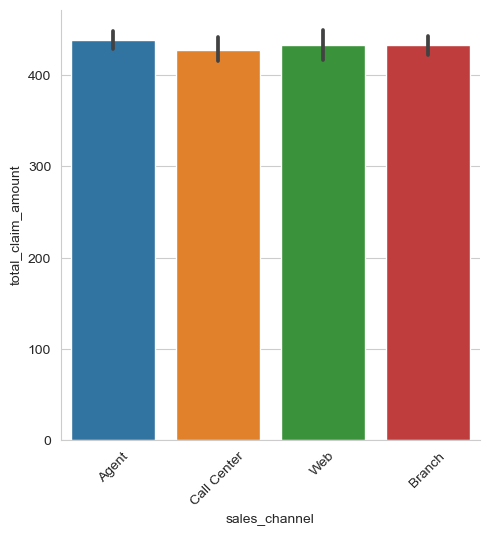

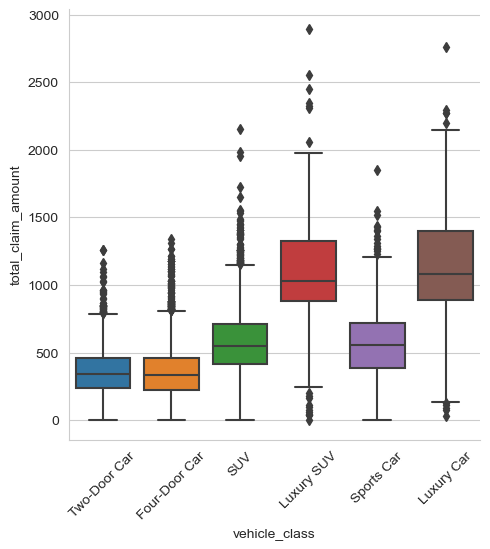

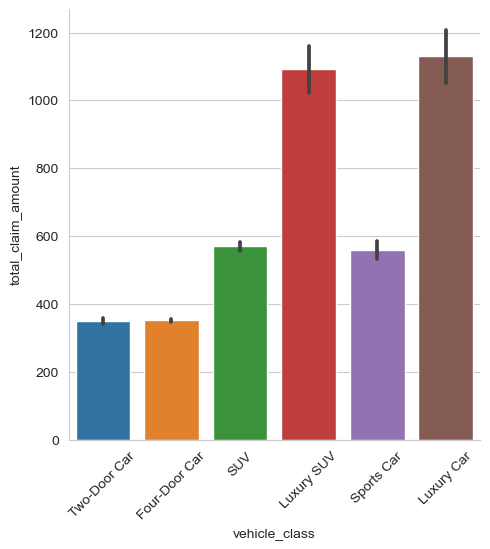

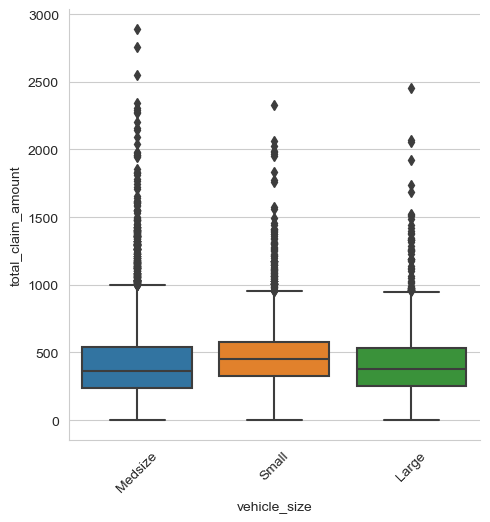

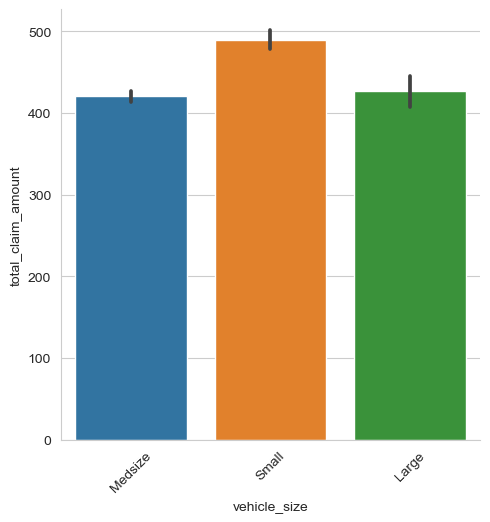

In [19]:
# Plot categorical data with target variable 

for col in customer_df.select_dtypes(np.object).columns:
    sns.catplot(x=col, y='total_claim_amount', data=customer_df, kind='box').set_xticklabels(rotation=45)
    sns.catplot(x=col, y='total_claim_amount', data=customer_df, kind='bar').set_xticklabels(rotation=45)
    plt.show()

In [20]:
# Observations

**`state`**: There is not a lot of variation in Y with different states. Therefore, `state` **is not good in determining the total claim amount**. We can delete the column state.

In [21]:
customer_df = customer_df.drop(columns=['state'], axis=1) 

**`response`**: There is not a lot of variation in Y with different categories. Therefore, `response` **is not good in determining the total claim amount**. We can delete the column response.

In [22]:
customer_df = customer_df.drop(columns=['response'], axis=1)

**`coverage`**: There is a lot of variation in Y with different categories. Therefore, `coverage` **is good in determining the total claim amount**. We shall keep the column coverage.

In [23]:
categorical_df.coverage.value_counts()

Basic       5568
Extended    2742
Premium      824
Name: coverage, dtype: int64

**`education`**: There is a lof of variation in Y with different categories. Therefore, `education` **is good in determining the total claim amount**. But there is not a lot of variation between Bachelor and College, as well as between Master and Doctor. Thus, we can keep the column education and group education status into 3 categories: ['High school or Below', 'Bachelor or College', 'Doctor or Master'].

In [24]:
def clean_education(x):
    if x in ['Bachelor', 'College']:
        return 'Bachelor or College'
    elif x in ['Master', 'Doctor']:
        return 'Doctor or Master'
    else:
        return x

customer_df['education'] = list(map(clean_education, customer_df['education']))

In [25]:
customer_df.education.value_counts()

Bachelor or College     5429
High School or Below    2622
Doctor or Master        1083
Name: education, dtype: int64

**`employmentstatus`**: There is a lof of variation in Y with different categories. Therefore, `employmentstatus` **is good in determining the total claim amount**. But there is not a lot of variation between Medical Leave,  Disabled and Retired. Thus, we can keep the column employmentstatus and group status into 3 categories: ['Employed', 'Unemployed', 'Other'].

In [26]:
def clean_employmentstatus(x):
    if x in ['Medical Leave', 'Disabled', 'Retired']:
        return 'Other'
    else:
        return x

customer_df['employmentstatus'] = list(map(clean_employmentstatus, customer_df['employmentstatus']))

In [27]:
customer_df.employmentstatus.value_counts()

Employed      5698
Unemployed    2317
Other         1119
Name: employmentstatus, dtype: int64

**`gender`**: There is not a lot of variation in Y with different gender. Therefore, `gender` **is not good in determining the total claim amount**. We can delete the column gender.

In [28]:
customer_df = customer_df.drop(columns=['gender'], axis=1)

**`location_code`**: There is a lot of variation in Y with different locations. Therefore, `location_code` **is good in determining the total claim amount**. We shall keep the column location_code.

In [29]:
customer_df.location_code.value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: location_code, dtype: int64

**`marital_status`**: There is a lot of variation in Y with different marital status. Therefore, `marital_status` **is good in determining the total claim amount**. But there is not a lot of variation between Married and Divorced. Thus, we can keep the column marital_status and group marital status into 2 categories: ['Single', 'Married or Divorced'].

In [30]:
def clean_maritalstatus(x):
    if x in ['Married', 'Divorced']:
        return 'Married or Divorced'
    else:
        return x

customer_df['marital_status'] = list(map(clean_maritalstatus, customer_df['marital_status']))

In [31]:
customer_df.marital_status.value_counts()

Married or Divorced    6667
Single                 2467
Name: marital_status, dtype: int64

**`policy_type`**: There is not a lot of variation in Y with different policy types. Therefore, `policy_type` **is not good in determining the total claim amount**. We can delete the column policy_type?

In [32]:
# customer_df = customer_df.drop(columns=['policy_type'], axis=1)

In [33]:
customer_df.policy_type.value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

**`policy`**: There is not a lot of variation in Y with different policies. Therefore, `policy` **is not good in determining the total claim amount**. Also, `policy` and `policy_type` is correlted. We can delete the column policy.

In [34]:
customer_df = customer_df.drop(columns=['policy'], axis=1)

**`renew_offer_type`**: There is a lot of variation in Y with different renew offer types. Therefore, `renew_offer_type` **is good in determining the total claim amount**. We can keep the column renew_offer_type.

In [35]:
customer_df.renew_offer_type.value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: renew_offer_type, dtype: int64

**`sales_channel`**: There is not a lot of variation in Y with different sales channels. Therefore, `sales_channel` **is not good in determining the total claim amount**. We can delete the column sales_channel.

In [36]:
customer_df = customer_df.drop(columns=['sales_channel'], axis=1)

**`vehicle_class`**: There is a lot of variation in Y with different categories. Therefore, `vehicle_class` **is good in determining the total claim amount**. But there is not a lot of variation between Two-Door Car and Four-Door Car, and between SUV and Sports Car, as well as between Luxury SUV and Luxury Car. Thus, we can keep the column vehicle_class and group vehicle into 3 classes: ['Sedan', 'Sport', 'Luxury'].

In [37]:
def clean_vehicleclass(x):
    if x in ['Two-Door Car', 'Four-Door Car']:
        return 'Sedan'
    elif x in ['SUV', 'Sports Car']:
        return 'Sport'
    else:
        return 'Luxury'

customer_df['vehicle_class'] = list(map(clean_vehicleclass, customer_df['vehicle_class']))

In [38]:
customer_df.vehicle_class.value_counts()

Sedan     6507
Sport     2280
Luxury     347
Name: vehicle_class, dtype: int64

**`vehicle_size`**: There is a lot of variation in Y with different size. Therefore, `vehicle_size` **is good in determining the total claim amount**. We can keep the column vehicle_size.

In [39]:
customer_df.vehicle_size.value_counts()

Medsize    6424
Small      1764
Large       946
Name: vehicle_size, dtype: int64

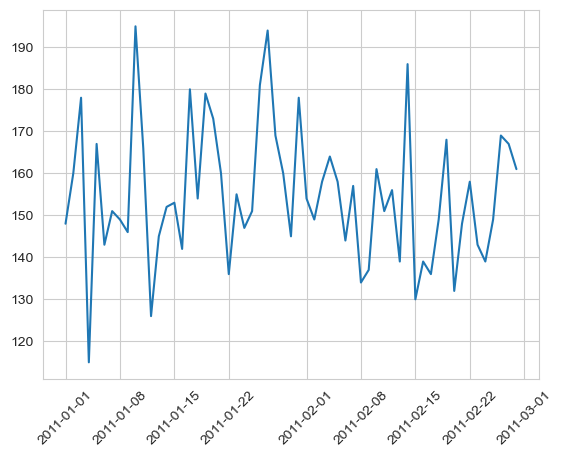

In [40]:
# Plot line plot of time variable 'effecitve_to_date'

counts = customer_df['effective_to_date'].value_counts().sort_index()
sns.lineplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45)
plt.show()

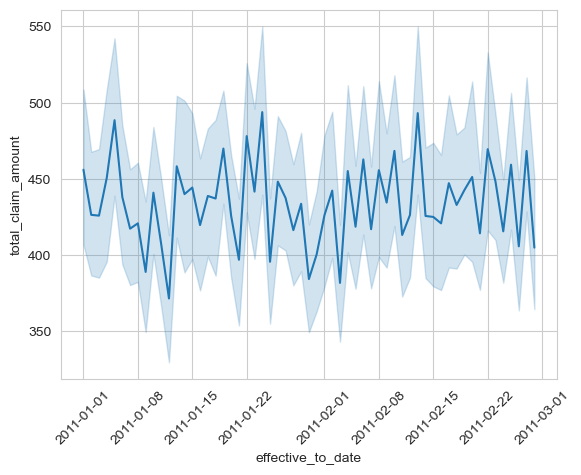

In [41]:
sns.lineplot(x='effective_to_date', y='total_claim_amount', data=customer_df)
plt.xticks(rotation=45)
plt.show()

In [42]:
# We can extract e.g. effective month.

customer_df['effective_month'] = customer_df['effective_to_date'].dt.strftime('%b')
customer_df.head()

,customer_lifetime_value,coverage,education,effective_to_date,employmentstatus,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,total_claim_amount,vehicle_class,vehicle_size,effective_month
customer,,,,,,,,,,,,,,,,,,,
BU79786,2763.519279,Basic,Bachelor or College,2011-02-24,Employed,56274,Suburban,Married or Divorced,69,32,5,0,1,Corporate Auto,Offer1,384.811147,Sedan,Medsize,Feb
QZ44356,6979.535903,Extended,Bachelor or College,2011-01-31,Unemployed,0,Suburban,Single,94,13,42,0,8,Personal Auto,Offer3,1131.464935,Sedan,Medsize,Jan
AI49188,12887.431650,Premium,Bachelor or College,2011-02-19,Employed,48767,Suburban,Married or Divorced,108,18,38,0,2,Personal Auto,Offer1,566.472247,Sedan,Medsize,Feb
WW63253,7645.861827,Basic,Bachelor or College,2011-01-20,Unemployed,0,Suburban,Married or Divorced,106,18,65,0,7,Corporate Auto,Offer1,529.881344,Sport,Medsize,Jan
HB64268,2813.692575,Basic,Bachelor or College,2011-02-03,Employed,43836,Rural,Single,73,12,44,0,1,Personal Auto,Offer1,138.130879,Sedan,Medsize,Feb


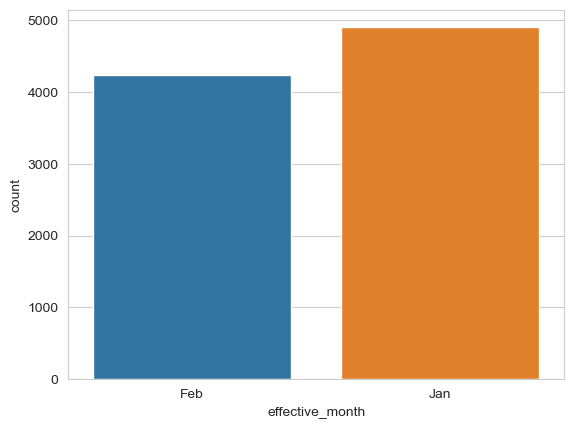

In [43]:
sns.countplot(x='effective_month', data=customer_df)
plt.show()

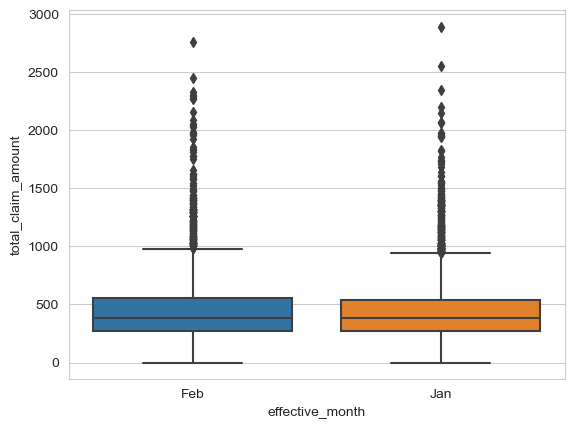

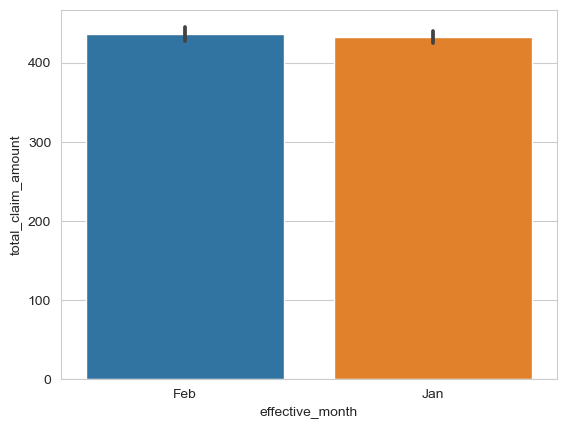

In [44]:
sns.boxplot(x='effective_month', y='total_claim_amount', data=customer_df)
plt.show()

sns.barplot(x='effective_month', y='total_claim_amount', data=customer_df)
plt.show()

In [45]:
# There is not a lot of variation in Y with different months, not good in determining the total claim amount --> drop

customer_df = customer_df.drop(columns=['effective_month'], axis=1)

In [46]:
# Box cox transformation

customer_df_trans = customer_df.copy()

def boxcox_transform(df):
    numeric_cols = df.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for col in numeric_cols:
        df[col] = np.where(df[col] <= 0, np.NAN, df[col]) 
        df[col] = df[col].fillna(df[col].mean())
        transformed_data, ci = stats.boxcox(df[col])
        df[col] = transformed_data
        _ci[col] = [ci] 
    return df, _ci

customer_df_trans, _ci = boxcox_transform(customer_df_trans)
customer_df_trans.head()

,customer_lifetime_value,coverage,education,effective_to_date,employmentstatus,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,renew_offer_type,total_claim_amount,vehicle_class,vehicle_size
customer,,,,,,,,,,,,,,,,,,
BU79786,2.703839,Basic,Bachelor or College,2011-02-24,Employed,1247.937066,Suburban,Married or Divorced,0.685347,10.876059,3.017887,0.648045,0.000000,Corporate Auto,Offer1,33.035752,Sedan,Medsize
QZ44356,2.754926,Extended,Bachelor or College,2011-01-31,Unemployed,1167.961720,Suburban,Single,0.685871,5.808248,18.780377,0.648045,1.424359,Personal Auto,Offer3,56.357614,Sedan,Medsize
AI49188,2.780772,Premium,Bachelor or College,2011-02-19,Employed,1144.063081,Suburban,Married or Divorced,0.686039,7.347815,17.389171,0.648045,0.607328,Personal Auto,Offer1,40.071789,Sedan,Medsize
WW63253,2.759125,Basic,Bachelor or College,2011-01-20,Unemployed,1167.961720,Suburban,Married or Divorced,0.686018,7.347815,26.160800,0.648045,1.363462,Corporate Auto,Offer1,38.763252,Sport,Medsize
HB64268,2.704995,Basic,Bachelor or College,2011-02-03,Employed,1072.375744,Rural,Single,0.685461,5.471294,19.461641,0.648045,0.000000,Personal Auto,Offer1,19.560154,Sedan,Medsize


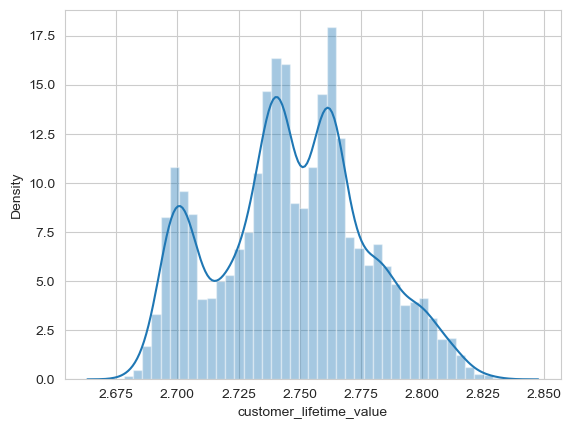

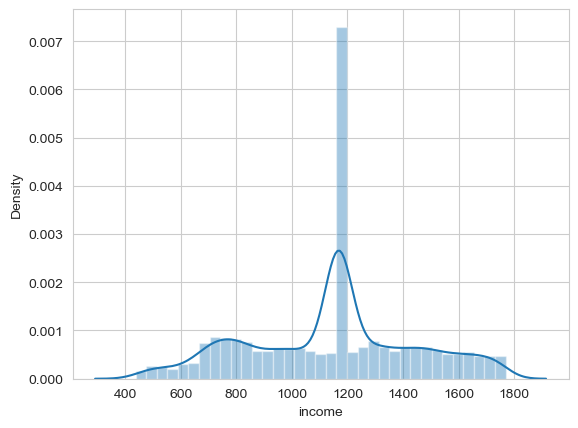

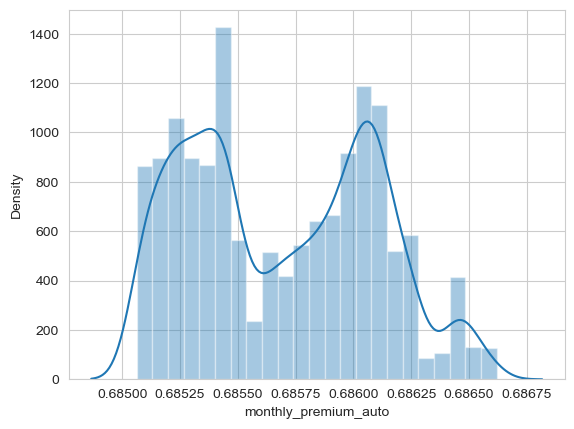

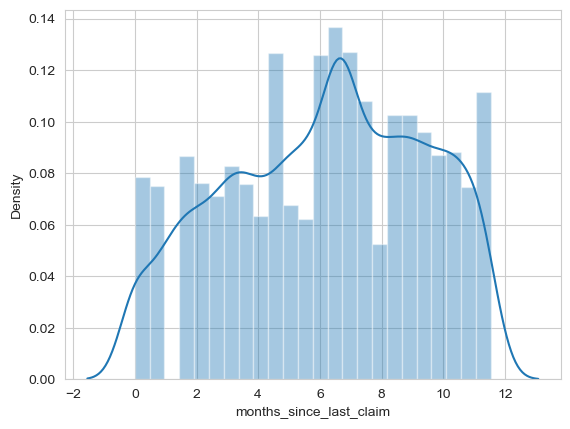

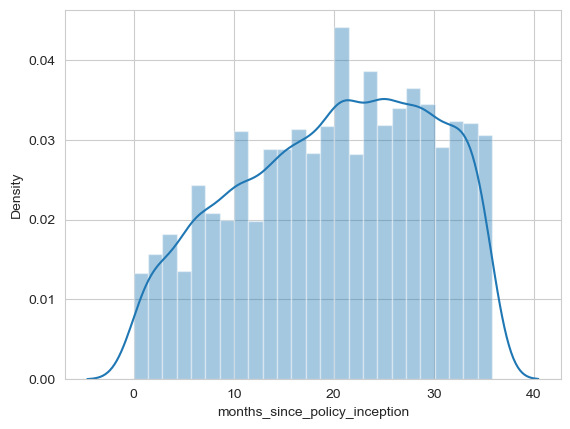

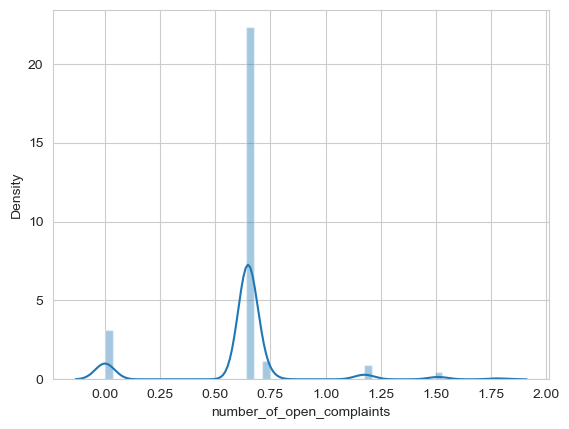

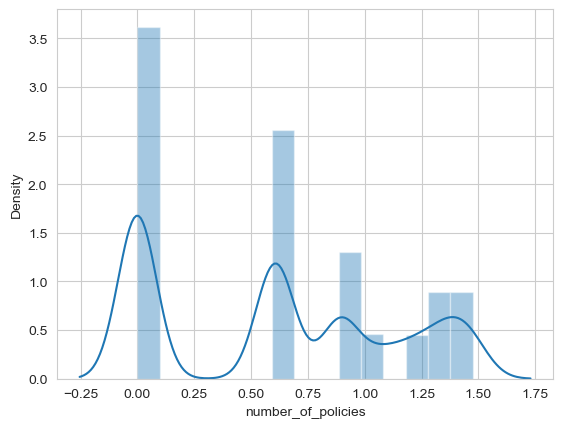

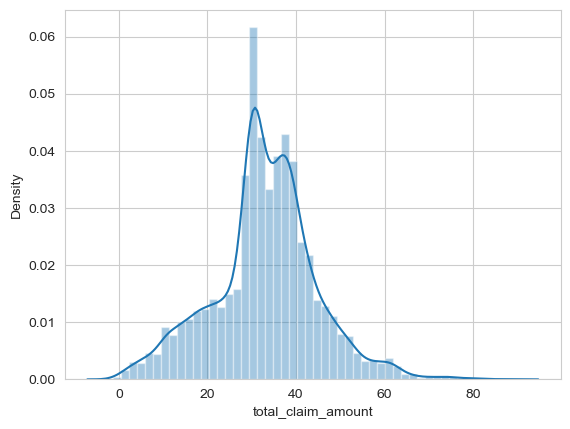

In [47]:
# Check changes in the distributions

for column in customer_df_trans.select_dtypes(np.number).columns:
    sns.distplot(customer_df_trans[column])
    plt.show()

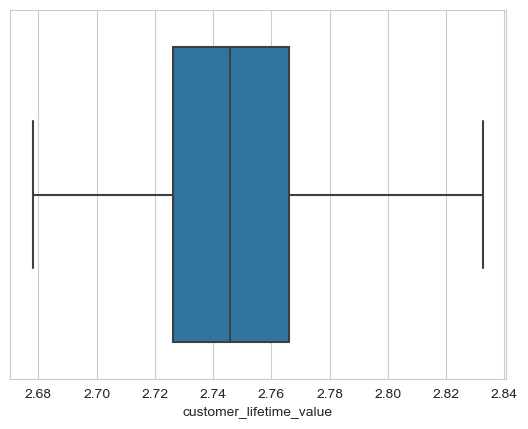

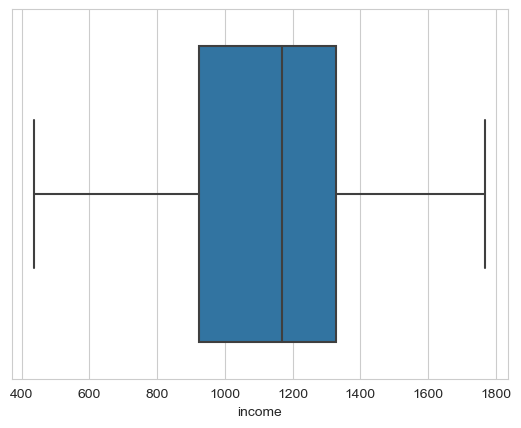

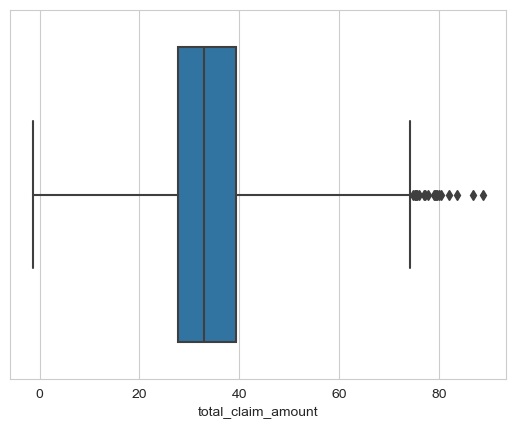

In [48]:
for column in continuous:
    sns.boxplot(x=customer_df_trans[column], whis=3)
    plt.xlabel(column)
    plt.show()

In [49]:
# 1. Removing outliers

def remove_outliers(df, threshold=1.5, in_columns=customer_df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(customer_df[column],75)
            lower = np.percentile(customer_df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

In [50]:
in_columns=customer_df.select_dtypes(np.number).columns

In [51]:
customer_df = remove_outliers(customer_df, threshold=3, skip_columns=['number_of_open_complaints', 'total_claim_amount',]) 
customer_df.shape

(8700, 18)

In [52]:
# 2. Create a copy of the dataframe for the data wrangling

customer_df1 = customer_df.copy()

In [53]:
# 3. Normalize the continuous variables

continuous = ['customer_lifetime_value', 'income', 'total_claim_amount']
scaler = StandardScaler()
customer_df1[continuous] = scaler.fit_transform(customer_df1[continuous])
customer_df1[continuous].head()

,customer_lifetime_value,income,total_claim_amount
customer,,,
BU79786,-0.961879,0.610980,-0.131520
QZ44356,0.014598,-1.234907,2.651946
AI49188,1.382934,0.364737,0.545698
WW63253,0.168927,-1.234907,0.409290
HB64268,-0.950259,0.202991,-1.051125


In [54]:
# 4. Encode the categorical variables

# One hot to state -->dropped
# Ordinal to coverage
# Ordinal to education
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy -->dropped
# One hot to renew offer type --> Why not Ordinal?
# One hot to sales channel -->dropped
# One hot vehicle class
# Ordinal vehicle size

# One hot 
one_hot_col = ['marital_status', 'policy_type', 'renew_offer_type', 'vehicle_class']
customer_df1 = pd.get_dummies(customer_df1, columns=one_hot_col)

In [55]:
# Ordinal 
ordinal_col = ['coverage', 'education', 'employmentstatus', 'location_code', 'vehicle_size']

customer_df1['coverage'] = customer_df1['coverage'].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
customer_df1['education'] = customer_df1['education'].map({"Doctor or Master" : 0, "Bachelor or College" : 1, "High School or Below" : 2})
customer_df1['employmentstatus'] = customer_df1['employmentstatus'].map({"Employed" : 0, "Other" : 1, "Unemployed" : 2})
customer_df1['location_code'] = customer_df1['location_code'].map({"Rural" : 0, "Urban" : 1, "Suburban" : 2})
customer_df1['vehicle_size'] = customer_df1['vehicle_size'].map({"Medsize" : 0, "Large" : 1, "Small" : 2})

In [56]:
# 5. Transform the time variable into a useful one

customer_df1['day_week'] = customer_df1['effective_to_date'].dt.dayofweek
customer_df1['month'] = customer_df1['effective_to_date'].dt.month
customer_df1 = customer_df1.drop(columns=['effective_to_date'], axis=1)

In [57]:
# 6. Check and make sure that every column is numerical

customer_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8700 entries, BU79786 to Y167826
Data columns (total 27 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   customer_lifetime_value             8700 non-null   float64
 1   coverage                            8700 non-null   int64  
 2   education                           8700 non-null   int64  
 3   employmentstatus                    8700 non-null   int64  
 4   income                              8700 non-null   float64
 5   location_code                       8700 non-null   int64  
 6   monthly_premium_auto                8700 non-null   int64  
 7   months_since_last_claim             8700 non-null   int64  
 8   months_since_policy_inception       8700 non-null   int64  
 9   number_of_open_complaints           8700 non-null   int64  
 10  number_of_policies                  8700 non-null   int64  
 11  total_claim_amount                  870